Cost after iteration 0: 0.6931471805599454
Cost after iteration 10: 0.49719681140883415
Cost after iteration 20: 0.4296660911545462
Cost after iteration 30: 0.3972622020452601
Cost after iteration 40: 0.37861690454650415
Cost after iteration 50: 0.366674733241752
Cost after iteration 60: 0.35846748248405336
Cost after iteration 70: 0.35253722440342494
Cost after iteration 80: 0.34808768768415554
Cost after iteration 90: 0.3446491675958241
Cost after iteration 100: 0.34192793685917594
Cost after iteration 110: 0.3397317029801752
Cost after iteration 120: 0.33792983641687885
Cost after iteration 130: 0.3364308411785444
Cost after iteration 140: 0.33516895265695307
Cost after iteration 150: 0.3340958337787013
Cost after iteration 160: 0.33317525052377933
Cost after iteration 170: 0.33237955700484373
Cost after iteration 180: 0.33168731693040443
Cost after iteration 190: 0.33108165977813303


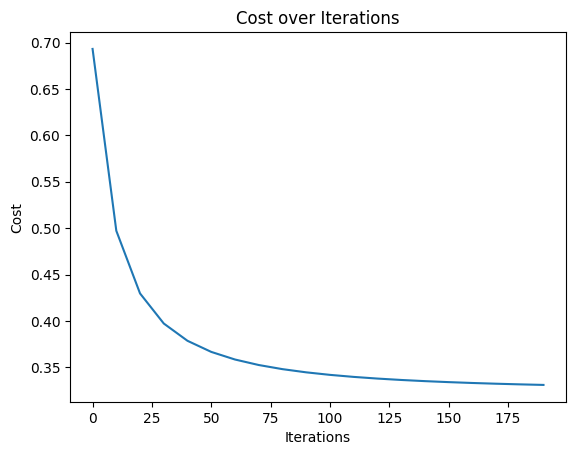

Test accuracy: 88.0 %


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv(r"C:\Users\Adi Shree\Desktop\python\Gotem Pumpkins.csv", index_col=0)
test_data = pd.read_csv(r"C:\Users\Adi Shree\Desktop\python\Freyja_Pumpkins.csv", index_col=0)

class_labels = train_data['Class'].unique()
class_mapping = {label: idx for idx, label in enumerate(class_labels)}

train_data['Class'] = train_data['Class'].map(class_mapping)
test_data['Class'] = test_data['Class'].map(class_mapping)

#making sure feature columns are numeric
train_data = train_data.apply(pd.to_numeric, errors='coerce')
test_data = test_data.apply(pd.to_numeric, errors='coerce')

#handle missing values (fill with 0)
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

#separate features and target variable for training
y_train = train_data['Class'].values  # target variable
x_data = train_data.drop(['Class'], axis=1)  # features
train_mean = np.mean(x_data, axis=0)
train_std = np.std(x_data, axis=0)

x_train = (x_data - train_mean) / train_std 
x_test_data = test_data.drop(['Class'], axis=1)
x_test = (x_test_data - train_mean) / train_std  # using training data's mean and std to standardize test data

#Reshape target variables for logistic regression
y_train = y_train.reshape(1, -1)
y_test = test_data['Class'].values.reshape(1, -1)

#logistic Regression functions
def initialize_weights_and_bias(dimension):
    w = np.zeros((dimension, 1))  # Initialize weights to zero
    b = 0.0  # Initialize bias to zero
    return w, b

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = np.sum(loss) / x_train.shape[1]

    #backward propagation
    derivative_weight = np.dot(x_train, (y_head - y_train).T) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]

    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

def update(w, b, x_train, y_train, learning_rate, num_iterations):
    cost_list = []
    for i in range(num_iterations):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        
        #update weights and bias
        w -= learning_rate * gradients["derivative_weight"]
        b -= learning_rate * gradients["derivative_bias"]
        
        if i % 10 == 0:
            print(f"Cost after iteration {i}: {cost}")

    plt.plot(range(0, num_iterations, 10), cost_list[::10])
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost over Iterations")
    plt.show()

    return w, b, cost_list

def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_prediction = (z > 0.5).astype(int)
    return y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)
    
    # Update weights and bias
    w, b, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
   
    y_prediction_test = predict(w, b, x_test)
   
    accuracy = 100 - np.mean(np.abs(y_prediction_test - y_test)) * 100
    print(f"Test accuracy: {accuracy} %")

logistic_regression(x_train.T, y_train, x_test.T, y_test, learning_rate=0.05, num_iterations=200)